In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/final_Project_bank_credit_scoring.csv')

df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [3]:
# Overview of each
df.info()

# Missing values check
# print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Задолженность              18420 non-null  float64
 1   Просрочка, дни             18420 non-null  int64  
 2   Первоначльный лимит        18420 non-null  float64
 3   BIRTHDATE                  18420 non-null  object 
 4   SEX                        18420 non-null  object 
 5   EDU                        18420 non-null  object 
 6   INCOME                     18420 non-null  float64
 7   TERM                       18420 non-null  int64  
 8   Рейтинг кредитной истории  17488 non-null  object 
 9   LV_AREA                    16297 non-null  object 
 10  LV_SETTLEMENTNAME          18374 non-null  object 
 11  INDUSTRYNAME               18420 non-null  object 
 12  PDN                        18420 non-null  float64
 13  CLIENTID                   18420 non-null  int

In [4]:
df.dtypes

Задолженность                float64
Просрочка, дни                 int64
Первоначльный лимит          float64
BIRTHDATE                     object
SEX                           object
EDU                           object
INCOME                       float64
TERM                           int64
Рейтинг кредитной истории     object
LV_AREA                       object
LV_SETTLEMENTNAME             object
INDUSTRYNAME                  object
PDN                          float64
CLIENTID                       int64
SCORINGMARK                  float64
UNDERAGECHILDRENCOUNT          int64
VELCOMSCORING                float64
FAMILYSTATUS                   int64
dtype: object

In [5]:
df.describe()

,Задолженность,"Просрочка, дни",Первоначльный лимит,INCOME,TERM,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
count,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,1.842000e+04,16786.000000,18420.000000,8889.000000,18420.000000
mean,4318.769750,9.196743,5127.834256,1664.840782,52.301737,0.290288,8.226245e+05,186.432622,0.636754,177.040162,1.498751
std,4336.432353,42.309092,4879.201691,1048.813447,13.378788,0.144359,1.966853e+05,67.430848,0.854167,310.624940,0.500988
min,0.000000,0.000000,180.000000,0.000000,23.000000,0.000000,1.289800e+04,-108.000000,0.000000,-2.000000,1.000000
25%,1287.900000,0.000000,1550.000000,1021.692500,36.000000,0.190000,7.193478e+05,134.000000,0.000000,-2.000000,1.000000
50%,2675.670000,0.000000,3200.000000,1460.175000,60.000000,0.300000,9.083645e+05,182.000000,0.000000,-2.000000,1.000000
75%,5785.870000,0.000000,6912.500000,1980.460000,60.000000,0.390000,9.621360e+05,234.000000,1.000000,278.000000,2.000000
max,40000.000000,491.000000,40000.000000,29942.820000,60.000000,1.210000,1.061453e+06,416.000000,3.000000,998.000000,4.000000


In [6]:
df.dropna()
df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [7]:
df.isnull().sum
df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [8]:
df['VELCOMSCORING'] = df['VELCOMSCORING'].fillna(0) 
df['SCORINGMARK'] = df['SCORINGMARK'].fillna(0) 
df['LV_AREA'] = df['LV_AREA'].fillna("N/A") 
df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,0.0,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,N/A,МИНСК,Финансы и страхование,0.17,539353,0.0,1,0.0,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,0.0,0,0.0,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,0.0,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,N/A,Минск,Медицина и здравоохранение,0.63,425193,0.0,0,0.0,2


In [9]:
df.rename(columns={'Задолженность': 'Debt'}, inplace=True)
df.rename(columns={'Просрочка, дни': 'Overdue Days '}, inplace=True)
df.rename(columns={'Первоначльный лимит': 'Initial Limit'}, inplace=True)
df.rename(columns={'Рейтинг кредитной истории': 'Credit History Rating'}, inplace=True)
df.head()

,Debt,Overdue Days,Initial Limit,BIRTHDATE,SEX,EDU,INCOME,TERM,Credit History Rating,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,0.0,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,N/A,МИНСК,Финансы и страхование,0.17,539353,0.0,1,0.0,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,0.0,0,0.0,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,0.0,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,N/A,Минск,Медицина и здравоохранение,0.63,425193,0.0,0,0.0,2


In [38]:
df['SEX'] = df['SEX'].replace('Мужской', 'MALE')
df['SEX'] = df['SEX'].replace('Женский', 'FEMALE')

df['FAMILYSTATUS'] = df['FAMILYSTATUS'].astype(str)

df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(1, 'SINGLE')
df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(2, 'MARRIED')
df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(3, 'DIVORCED')
df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(4, 'SINGLE_PARENT')
df.head()

,Debt,Overdue Days,Initial Limit,BIRTHDATE,SEX,EDU,INCOME,TERM,Credit History Rating,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,MALE,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,0.0,1
1,3765.04,0,5000.0,1987-12-19,FEMALE,Высшее,1693.68,60,B2,N/A,МИНСК,Финансы и страхование,0.17,539353,0.0,1,0.0,1
2,2067.66,0,2650.0,1966-02-28,FEMALE,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,0.0,0,0.0,2
3,2370.39,0,3000.0,1972-02-18,FEMALE,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,0.0,2
4,2280.55,0,3000.0,1997-02-23,FEMALE,Высшее,1092.65,60,B3,N/A,Минск,Медицина и здравоохранение,0.63,425193,0.0,0,0.0,2


In [11]:
# mean_age = df["clnt_age"].mean()
most_gender = df["SEX"].mode()[0]
most_credit_ranking = df["Credit History Rating"].mode()[0]
AVG_Debt = df["Debt"].mean()
MAX_Debt = df["Debt"].max()
MIN_Debt = df["Debt"].min()
AVG_Limit = df["Initial Limit"].mean()
MAX_Limit = df["Initial Limit"].max()
MIN_Limit = df["Initial Limit"].min()

AVG_INCOME = df["INCOME"].mean()
MAX_INCOME = df["INCOME"].max()
MIN_INCOME = df["INCOME"].min()

AVG_PDN = df["PDN"].mean()
MAX_PDN = df["PDN"].max()
MIN_PDN = df["PDN"].min()

AVG_SCORINGMARK	 = df["SCORINGMARK"].mean()
MAX_SCORINGMARK	 = df["SCORINGMARK"].max()
MIN_SCORINGMARK	 = df["SCORINGMARK"].min()

print(f"AVG_SCORINGMARK: {AVG_SCORINGMARK:.2f}")
print("MAX_SCORINGMARK:",MAX_SCORINGMARK)
print("MIN_SCORINGMARK:",MIN_SCORINGMARK)

print(f"AVG_INCOME: {AVG_INCOME: .2f}")
print("MAX_INCOME:",MAX_INCOME)
print("MIN_INCOME:",MIN_INCOME)

print(f"AVG_PDN: {AVG_PDN: .2f}")
print("MAX_PDN:",MAX_PDN)
print("MIN_PDN:",MIN_PDN)

print(f"AVG_Debt: {AVG_Debt: .2f}")
print("MAX_Debt:",MAX_Debt)
print("MIN_Debt:",MIN_Debt)

print(f"AVG_Initial Limit: {AVG_Limit: .2f}")
print("MAX_Initial Limit:",MAX_Limit)
print("MIN_Initial Limit:",MIN_Limit)

print("most fredquent gender:", most_gender)
print("most credit ranked:", most_credit_ranking)

AVG_SCORINGMARK: 169.89
MAX_SCORINGMARK: 416.0
MIN_SCORINGMARK: -108.0
AVG_INCOME:  1664.84
MAX_INCOME: 29942.82
MIN_INCOME: 0.0
AVG_PDN:  0.29
MAX_PDN: 1.21
MIN_PDN: 0.0
AVG_Debt:  4318.77
MAX_Debt: 40000.0
MIN_Debt: 0.0
AVG_Initial Limit:  5127.83
MAX_Initial Limit: 40000.0
MIN_Initial Limit: 180.0
most fredquent gender: MALE
most credit ranked: B3


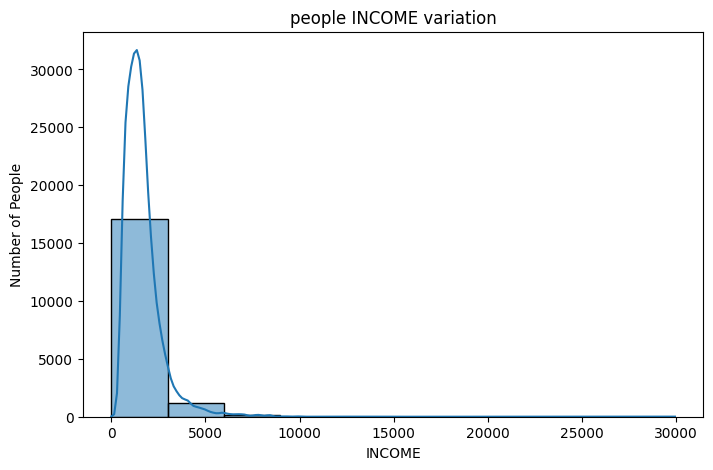

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['INCOME'], bins=10, kde=True)
plt.title('people INCOME variation')
plt.xlabel('INCOME')
plt.ylabel('Number of People')
plt.show()

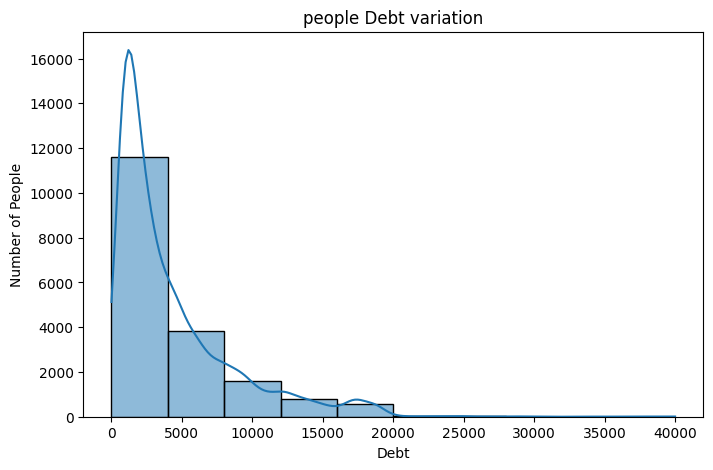

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Debt'], bins=10, kde=True)
plt.title('people Debt variation')
plt.xlabel('Debt')
plt.ylabel('Number of People')
plt.show()

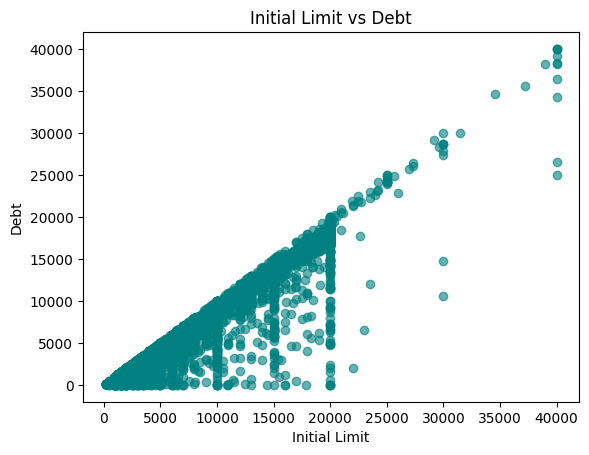

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['Initial Limit'], df['Debt'], alpha=0.6, color='teal')
plt.xlabel('Initial Limit')
plt.ylabel('Debt')
plt.title('Initial Limit vs Debt')
plt.show()

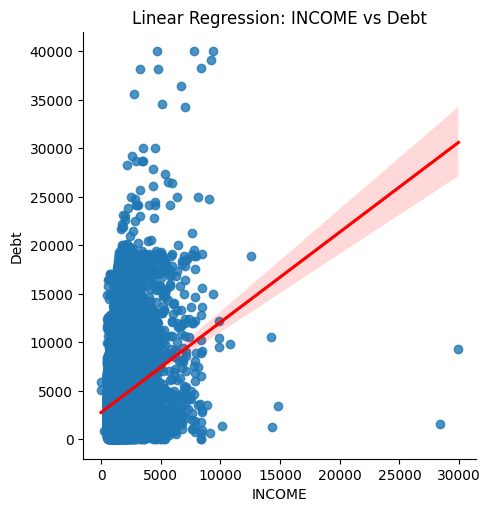

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='INCOME', y='Debt', data=df, line_kws={'color': 'red'})
plt.title('Linear Regression: INCOME vs Debt')
plt.xlabel('INCOME')
plt.ylabel('Debt')
plt.show()

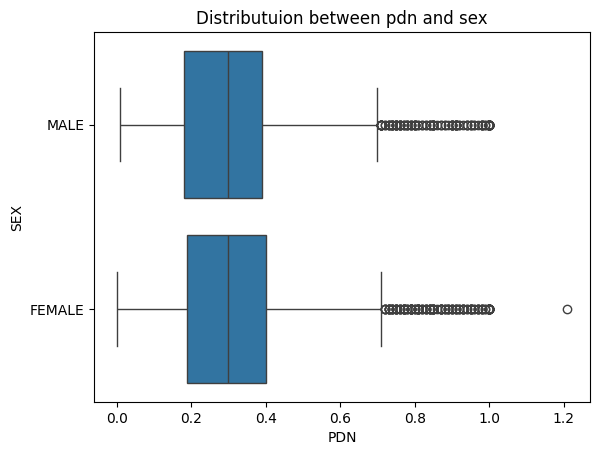

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='PDN', y='SEX', data=df)
plt.title('Distributuion between pdn and sex')
plt.show()

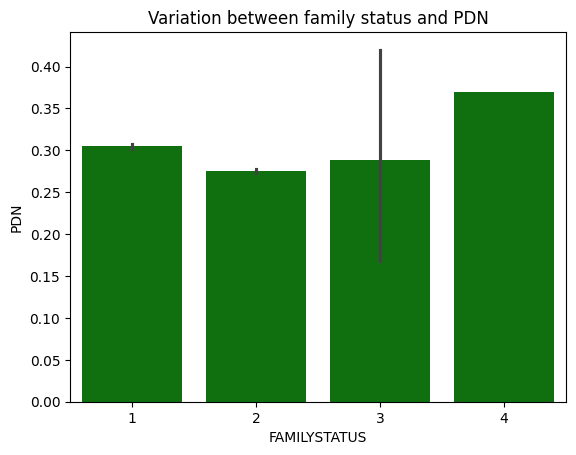

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='PDN', x='FAMILYSTATUS', data=df, color="green")
plt.title('Variation between family status and PDN')
plt.show()

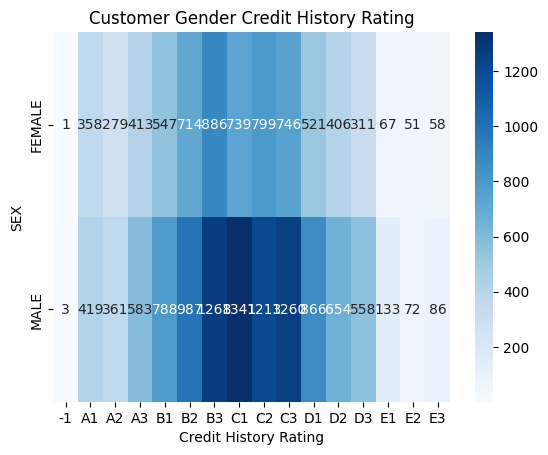

In [18]:
import seaborn as sns
import pandas as pd

# Example using crosstab
cross_tab = pd.crosstab(df['SEX'], df['Credit History Rating'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Customer Gender Credit History Rating')
plt.show()

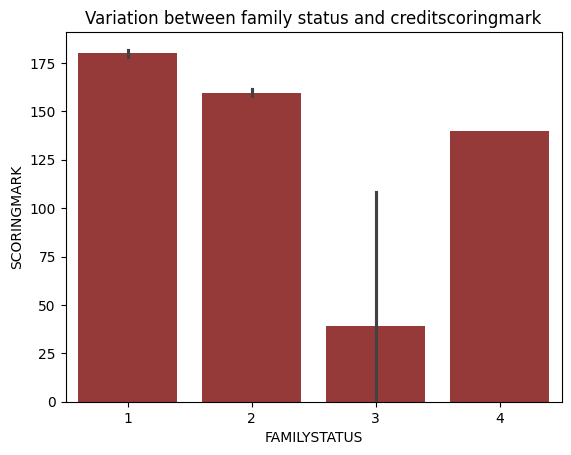

In [19]:
sns.barplot(y='SCORINGMARK', x='FAMILYSTATUS', data=df, color="brown")
plt.title('Variation between family status and creditscoringmark')
plt.show()

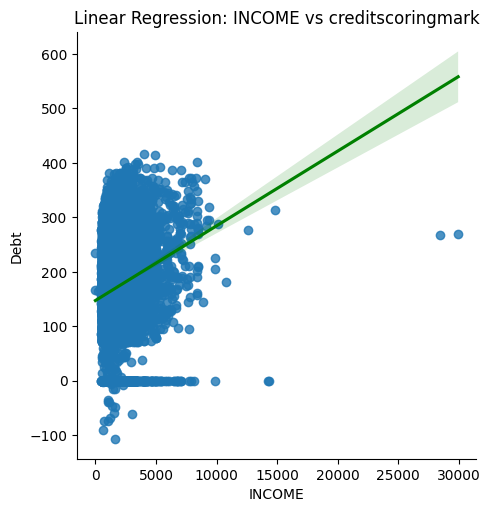

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='INCOME', y='SCORINGMARK', data=df, line_kws={'color': 'green'})
plt.title('Linear Regression: INCOME vs creditscoringmark')
plt.xlabel('INCOME')
plt.ylabel('Debt')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

X = df[['INCOME']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Mean Squared Error: 6934.4343897485105
R² Score: 0.028825131777318602
Predicted_Value: [181.90324958 173.0209403  174.40552997 ... 168.46205815 170.8423017
 154.86453112]


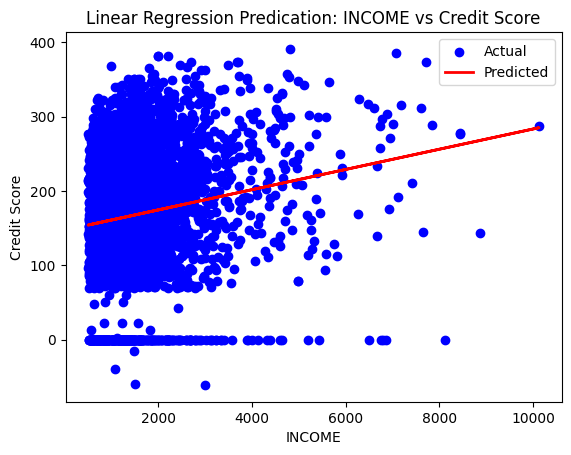

In [22]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('INCOME')
plt.ylabel('Credit Score')
plt.title('Linear Regression Predication: INCOME vs Credit Score')
plt.legend()
plt.show()

In [23]:
X = df[['FAMILYSTATUS']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Accuracy: 0.09229098805646037
Predicted_Value: [0. 0. 0. ... 0. 0. 0.]


C:\Users\ugoch\Documents\Ironhack_Bootcamp\ugo-final-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['FAMILYSTATUS']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Accuracy: 0.004885993485342019
Predicted_Value: [ 83.  83. 191. ...  83.  83.  83.]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

X = df[['FAMILYSTATUS']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Random Forest Accuracy: 0.09229098805646037
Predicted_Value: [0. 0. 0. ... 0. 0. 0.]


In [26]:
from sklearn.ensemble import AdaBoostClassifier

X = df[['FAMILYSTATUS']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Ada Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Ada Boosting Accuracy: 0.09229098805646037
Predicted_Value: [0. 0. 0. ... 0. 0. 0.]


In [27]:
from sklearn.ensemble import BaggingClassifier

X = df[['FAMILYSTATUS']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BaggingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Bagging Accuracy: 0.09229098805646037
Predicted_Value: [0. 0. 0. ... 0. 0. 0.]


In [28]:
X = df[['INCOME']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Mean Squared Error: 0.021563574641572315
R² Score: 0.0014516670868617298
Predicted_Value: [0.27911079 0.28693397 0.28571448 ... 0.29094925 0.28885282 0.3029254 ]


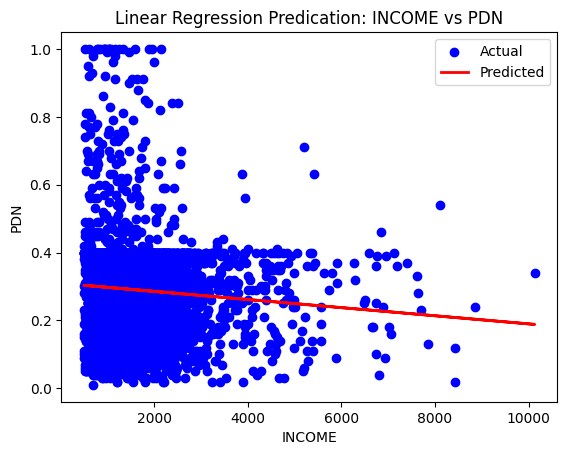

In [29]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('INCOME')
plt.ylabel('PDN')
plt.title('Linear Regression Predication: INCOME vs PDN')
plt.legend()
plt.show()

In [30]:
X = df[['INCOME']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Accuracy: 0.048317046688382194
Predicted_Value: [390.   0.   0. ...  85.   0. 252.]


In [31]:
X = df[['INCOME']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Accuracy: 0.04668838219326819
Predicted_Value: [390. 282. 198. ... 231. 170. 252.]
